# Exercise 1.02
## Dealing with messy data

*Missing data*

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

tips = sns.load_dataset('tips')

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
size = tips['size'].copy()
size.loc[:15] = np.nan
size.head(20)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    3.0
17    3.0
18    3.0
19    3.0
Name: size, dtype: float64

In [4]:
size.shape

(244,)

In [5]:
size.isna().sum()

16

In [6]:
size.isna().sum() / size.shape[0] * 100

6.557377049180328

In [7]:
mean = round(size.mean())
mean

3

In [8]:
size.fillna(mean, inplace=True)


In [9]:
size.head(20)

0     3.0
1     3.0
2     3.0
3     3.0
4     3.0
5     3.0
6     3.0
7     3.0
8     3.0
9     3.0
10    3.0
11    3.0
12    3.0
13    3.0
14    3.0
15    3.0
16    3.0
17    3.0
18    3.0
19    3.0
Name: size, dtype: float64

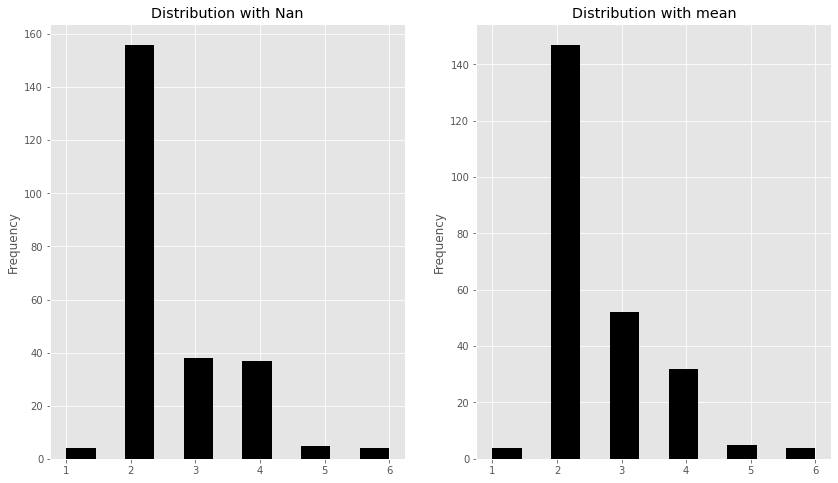

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
tips['size'].plot(
    title='Distribution with Nan',
    kind='hist',
    bins=11,
    color='k',
    ax=ax[0]
)
size.plot(
    title='Distribution with mean',
    kind='hist',
    bins=11,
    color='k',
    ax=ax[1]
)

In [11]:
min_val = size.mean() - (3 * size.std())
min_val

-0.1974349065787404

In [12]:
max_val = size.mean() + (3 * size.std())
max_val

5.369566054119724

In [13]:
outliers = size[size > max_val]
outliers.count()

4

In [14]:
outliers

125    6.0
141    6.0
143    6.0
156    6.0
Name: size, dtype: float64

In [15]:
df = tips.copy()
size = df['size']
size.loc[:15] = np.nan
size.head(20)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    3.0
17    3.0
18    3.0
19    3.0
Name: size, dtype: float64

In [16]:
mean = size.mean()
mean = round(mean)
print(mean)

3


In [17]:
size.fillna(mean, inplace=True)
size.head(20)

0     3.0
1     3.0
2     3.0
3     3.0
4     3.0
5     3.0
6     3.0
7     3.0
8     3.0
9     3.0
10    3.0
11    3.0
12    3.0
13    3.0
14    3.0
15    3.0
16    3.0
17    3.0
18    3.0
19    3.0
Name: size, dtype: float64

In [18]:
min_val = size.mean() - (3 * size.std())
min_val

-0.1974349065787404

In [19]:
max_val = size.mean() + (3 * size.std())
max_val

5.369566054119724

In [20]:
outliers = size[size > max_val]
outliers.count()

4

In [21]:
outliers

125    6.0
141    6.0
143    6.0
156    6.0
Name: size, dtype: float64

In [22]:
size = size[size <= max_val]
size.shape

(240,)

# Exercise 1.03
## Applying Feature Engineering over Text Data

In [23]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [24]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,3.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,3.0
4,24.59,3.61,Female,No,Sun,Dinner,3.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    float64 
dtypes: category(4), float64(3)
memory usage: 7.4 KB


In [30]:
cat_features = df.select_dtypes(exclude='number').columns.tolist()
cat_features

['sex', 'smoker', 'day', 'time']

In [36]:
encoder = LabelEncoder()
for cat in cat_features:
  df[cat] = encoder.fit_transform(df[cat].astype('str'))

df[cat_features].head()

,sex,smoker,day,time
0,0,0,2,0
1,1,0,2,0
2,1,0,2,0
3,1,0,2,0
4,0,0,2,0
